# Supermarket Analysis for Business Strategy Orientation. 

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')
import seaborn as sns 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Extracting the Data 

In [3]:
df = pd.read_csv('divine_supermarket.csv')

In [4]:
#Viewing the data.
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Data Exploration and Cleaning

* ### Viewing the data

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
#Checking the columns of the dataset.
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
#Checking the axes of the dataset.
df.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
        'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
        'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
        'Rating'],
       dtype='object')]

In [9]:
#Checking the count of rows and columns.
df.shape

(1000, 17)

* ### Convert to appropriate datatype

In [10]:
#Checking the datatypes.
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

* ### Finding the missing values 

In [11]:
#Finding the missing values
df.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

* ### Statistical and Concise Summary

* #### Number of branches this supermarket has

In [49]:
branches = df['Branch'].unique().tolist()
print('There are {} branches as followed\n{}'.format(len(branches), branches))

There are 3 branches as followed
['A', 'C', 'B']


* #### Sited Locations of these branches.

In [15]:
# Locations of the supermarket.
locations = df['City'].unique().tolist()
print('There are {} cities covered\n{}'.format(len(locations), locations))

There are 3 cities covered
['Yangon', 'Naypyitaw', 'Mandalay']


* #### Statistical Summary of the supermarket data.

In [16]:
#Total statistical count of supermarket data.
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* ### Convert date and time to datetime datatype

In [18]:
#Converting the date to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
#Converting the time to datetime datatype.
df['Time'] = pd.to_datetime(df['Time'])

In [20]:
#Checking the datatypes to confirm.
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

## Data Analysis Continuation


In [21]:
#Checking the gender count.
df['Gender'].describe()

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

In [22]:
#Checking the product line count,its unique values and top product.
df['Product line'].describe()

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [23]:
#Maximum unit quantity purchased. 
df['Quantity'].max()

10

In [24]:
#Minimum unit of quantity purchased.
df['Quantity'].min()

1

In [25]:
#Count of the payment column,unique values and the top payment method.
df['Payment'].describe()

count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object

In [26]:
#Count of the customer type column,unique values and the top customer type.
df['Customer type'].describe()

count       1000
unique         2
top       Member
freq         501
Name: Customer type, dtype: object

In [27]:
#Statistical summary of the Ratings.
df['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [28]:
#Count of branches,their unique values and their top branch frequency.
df['Branch'].describe()

count     1000
unique       3
top          A
freq       340
Name: Branch, dtype: object

In [29]:
#Statistical summary of the cogs.
df['cogs'].describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64

In [30]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-06-13 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-06-13 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-06-13 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-06-13 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-06-13 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-06-13 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-06-13 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-06-13 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-06-13 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [34]:
#Grouping branches by the total payment collected.
df.groupby(['Branch'])['Total'].sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [35]:
#Grouping the various gender by the total payment made.
df.groupby(['Gender'])['Total'].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

## Data Visualization

* ### Count Plot of the various branches and the one with the highest sales.

Text(0.5, 1.0, 'The Branches and their Sales count')

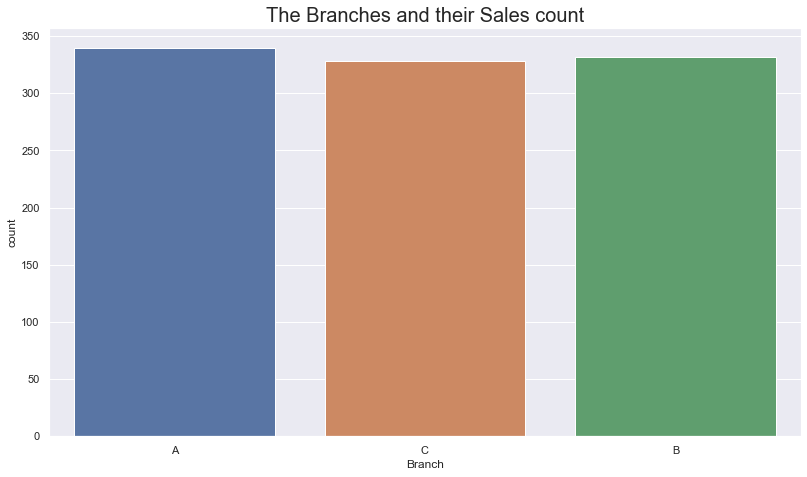

In [36]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot('Branch', data=df)
plt.title('The Branches and their Sales count',fontsize = 20)


* ### Count Plot showing what gender frequents the supermarket more.

Text(0.5, 1.0, 'The Gender and their frequency')

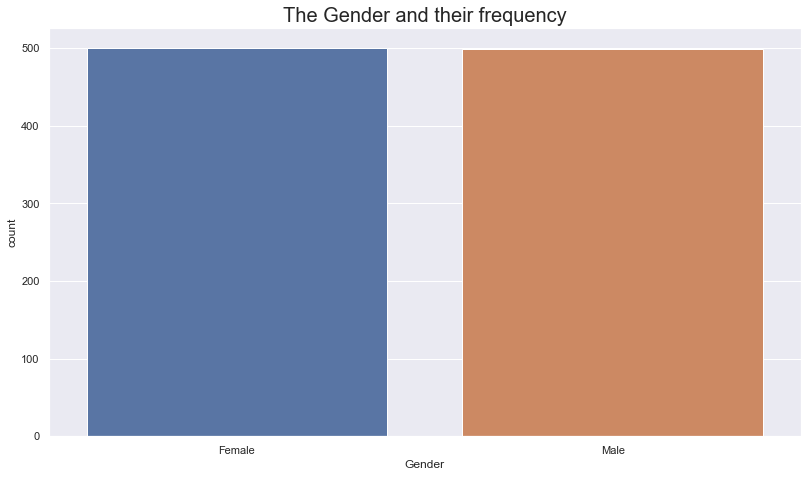

In [37]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot('Gender', data=df)
plt.title('The Gender and their frequency',fontsize = 20)

* ### Count PLot showing the Product that has the highest frequency of sales.

Text(0.5, 1.0, 'The Products and their frequency')

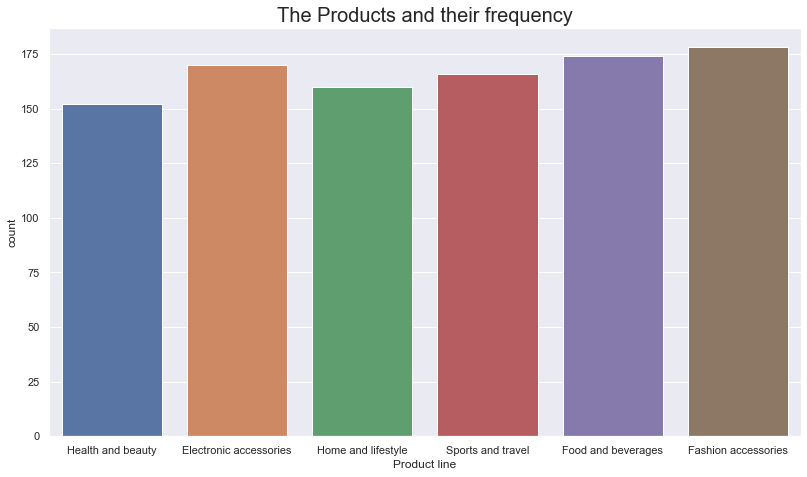

In [38]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot('Product line', data=df)
plt.title('The Products and their frequency',fontsize = 20)

* ### Count Plot of various payment methods employed in the supermarket.

Text(0.5, 1.0, 'The Payment methods and their frequencies')

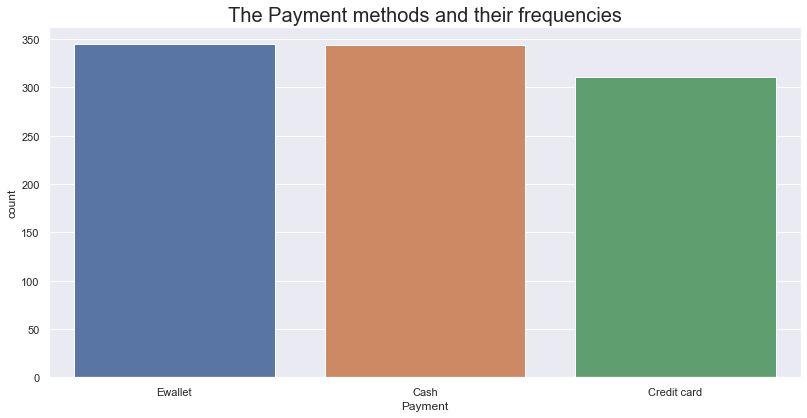

In [39]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot('Payment', data=df)
plt.title('The Payment methods and their frequencies',fontsize = 20)

* ### Bar Plot of Branches and their total sales.

Text(0.5, 1.0, 'Branches and their total sales')

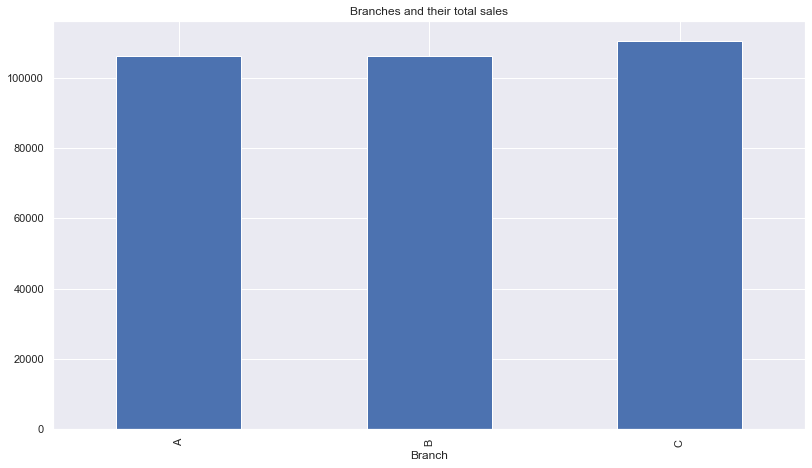

In [40]:
plt.figure(figsize=(12,7))
df.groupby(['Branch'])['Total'].sum().plot.bar()
plt.title('Branches and their total sales')

* ### Branches and their various payment methods. 

Text(0.5, 1.0, 'The Branches and their Payment method')

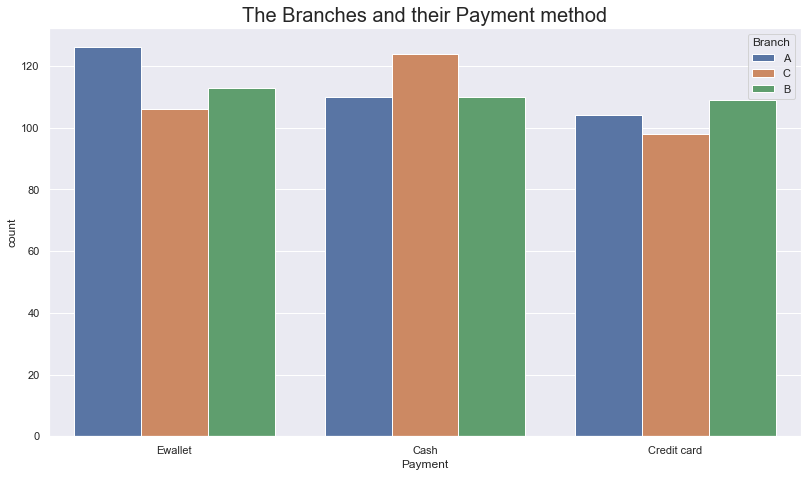

In [41]:
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot('Payment', data=df, hue = 'Branch')
plt.title('The Branches and their Payment method',fontsize = 20)

* ### Branches and the ranges of their product line.

<AxesSubplot:xlabel='Branch', ylabel='Counts'>

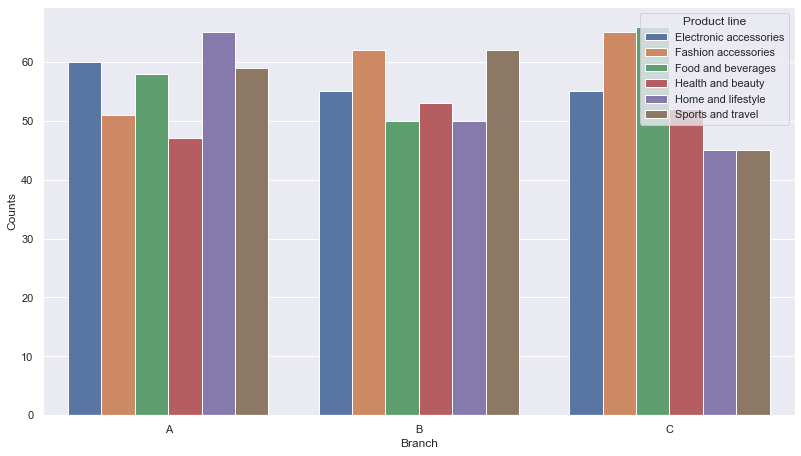

In [44]:
product_branch = df.groupby(['Branch', 'Product line']).size().reset_index(name='Counts')

plt.figure(figsize=(12, 7))
sns.barplot(x="Branch", y="Counts", hue="Product line", data=product_branch)

* ### Most demanded category in product line

<BarContainer object of 6 artists>

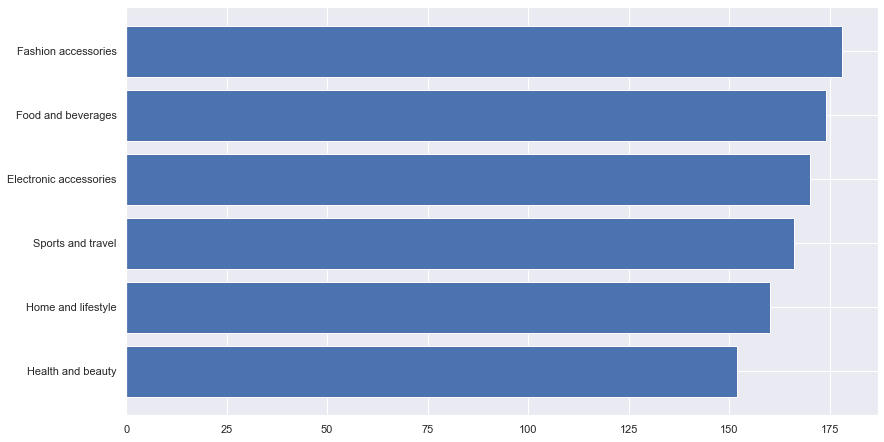

In [45]:
category_product = df.groupby(['Product line']).size().reset_index(name='Counts')
plt.barh('Product line', 'Counts', data= category_product.sort_values(by='Counts'))

* ### Total income per product sold.

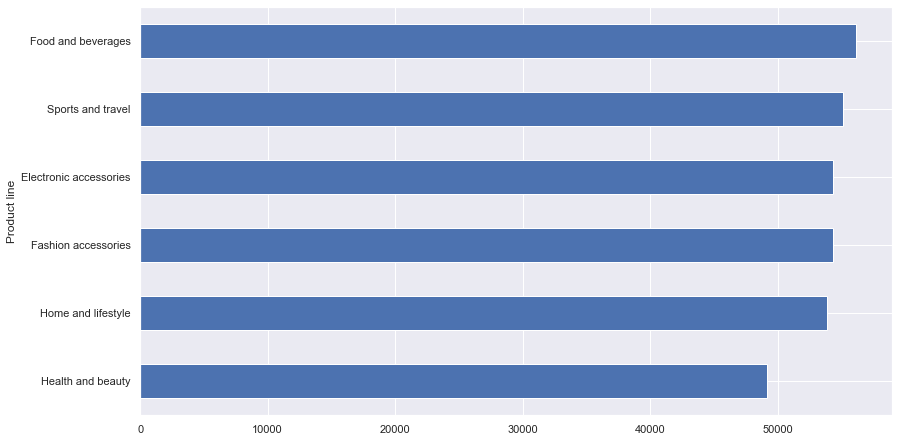

In [48]:
sell_total = df.groupby('Product line')['Total'].sum()
sell_total = sell_total.sort_values()
sell_total.plot.barh(x='Product line');